# Kinetics X

This lecture considers the analysis of surface reactions (heterogeneous catalysis).  We introduce the reaction equilibrium assumption and develop the Langmuir-adsorption model, which has wide usage in catalysis and adsorption phenomena.

```{tip}
As you work through this notebook, consider the differences between the Pseudo Steady State Approximation, which we used for radical reactions and enzyme catalyzed reactions, and the idea of an equilibrated reaction, which we will use frequently when analyzing reaction rates over heterogeneous catalysts.
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Heterogeneous Catalysis

When we discuss heterogeneous catalysis, we are generally referring to overall gas- or liquid-phase reactions that occur through a series of intermediate steps on a solid surface.  The classic example that we've used in this course is that of ammonia synthesis in the Haber-Bosch process.  

### Ammonia Synthesis

Overall, the macroscopic, gas-phase reaction is this one:

$$N_2 + 3H_2 \rightleftharpoons 2NH_3$$

However, what actually is happening at a molecular level is that $N_2$ and $H_2$ molecules from the gas phase are dissociating on exposed Fe or Ru atoms to form adsorbed $N$ and $H$ species that are bound to the catalyst surface. These surface-bound $N$ and $H$ atoms then react sequentially, forming $NH$, $NH_2$, and $NH_3$ species that are all bound to the catalyst surface. The $NH_3$ is a stable ammonia molecule, and it desorbs as the macroscopic reaction product. In most cases, we don't really "see" the $N$, $H$, $NH$, $NH_2$, and $NH_3$ species that exist on the catalyst surface.  We only observe $N_2$, $H_2$, and $NH_3$ species in the gas phase. Still, the surface intermediates play a critical role! An illustration of that basic idea is given below.

```{figure} ../images/Ammonia.svg
---
height: 400px
name: Ammonia
---
Ammonia Synthesis: A Heterogeneous Reaction
```

This illustration is generally what catalysis looks like on a metal surface. The exposed atoms are "active sites" that facilitate reactions of species that are stable in the gas phase. Things are a little more complicated in a real reactor.  The conversion we achieve in a catalytic reactor depends on the number of these "active sites" that are present in the reactor, which ultimately depends on the amount of catalyst surface area inside of the reactor. Bulk metal particles have very low surface area (few active sites per unit area), so, in order to achieve practical levels of fractional conversion, we would have to put a very large and expensive quantity of bulk Ni, Fe, Ru, Pt, etc. inside of our reactor.

### Porous materials

Our usual workaround for this is to use a very high surface area material as a "support." High surface area materials are generally porous solids.  Imagine a sponge with pores that are on the nanometer scale.  Frequently these materials have massive surface areas, on the order of $100 - 1000 \ \mathrm{m^2 \ g^{-1}}$.  These porous materials allow you to pack a very large surface area into a reasonably sized reactor (because they have so much surface area per unit mass).  Pretty much any kind of industrial heterogeneous catalysis we can imagine is actually going to occur on the surface of these porous materials.  If it is an acid catalyzed reaction, we would have protons $(H^+)$ distributed on the surface of these materials.  These protons would be our "active sites."  A base catalyst would have electron rich species distributed on the surface, e.g., $(O^{2-})$. If we need a metal catalyst, we would usually "disperse" it onto this high surface area material. Ultimately, this would look like many very small metal nanoparticles (1 - 20 nm) that are stabilized on the high surface area support, which is typically something like $SiO_2$, $Al_2O_3$, $TiO_2$, or $C$. In this way, we can maximize the metal surface area (by virtue of having very small particles) and so make our catalyst cost effective and practical for use in an industrial reactor.

```{figure} ../images/Ammonia3.svg
---
height: 400px
name: Ammonia3
---
On supported catalysts, active sites may be a minor component of the exposed surface area!
```

### Packed bed reactors

For practical reasons, we cannot fill a reactor with nanometer sized particles of high surface area support with catalytic sites on them. This would be a) be generally costly and energy intensive to manufacture consistently and b) cause enormous pressure drops in the packed bed. In industrial practice, we deal with large reactors and massive quantities of catalyst, so we are usually working with porous catalyst "pellets" (white spheres in the PBR below) that have macroscale dimensions on the order of centimeters or inches, and where the vast majority of "active sites" are embedded inside of the pores (see gray spheres inside of the inert porous pellet). 

```{figure} ../images/PBRwPorosity.svg
---
height: 400px
name: PBRwPorosity
---
In a packed bed, there may be significant differences between bulk gas temperature/composition and the temperature/composition at the active site.
```

This sets up an additional bit of complexity:

Active sites are distributed throughout these cm-scale porous materials (see illustration of packed bed above), and there is no convective flow in their pores...so reacting species, in the course of flowing through the packed bed in the bulk gas phase or liquid phase must diffuse through the porous particle and to the active site before they can adsorb and react. Then, the products must diffuse away from the active site and back into the bulk flow before we can recover them at the exit of the reactor. This means that you can have multiple phenomena controlling the rate at which the catalyst converts reactants into products. If the rate of diffusion to and from the active sites is very fast (and reaction is relatively slow), then the process is "kinetically controlled" by elementary processes of adsorption and reaction on the active sites. If you have very fast reactions (compared to diffusion), then the rate of mass transfer will control the rate at which reactants are converted to products, and we would say the system is "diffusion controlled" or "mass transfer controlled." If you want to learn more about designing reactors where catalysts operate under conditions of heat or mass transfer, you can take my graduate course (CEN 786). For the rest of our analysis in CEN 587, we will make the following assumption when dealing with surface reactions: 

**We will assume that rates of heat and mass transfer in the reactor and the catalyst pellet are infinitely fast relative to rates of reaction**

This means that the temperature and composition in the bulk fluid are identical to the temperature and composition at the active site inside of the porous pellet. This means that production rates of species are under full kinetic control, and it makes our analysis much simpler.

### Mechanisms of (Heterogeneous) Catalytic Reactions

Now we'll focus in on the mechanisms of catalytic reactions.  Sticking with ammonia synthesis, we can think of this conceptually as surface active sites facilitating dissociation of $N_2$ and $H_2$ to form $N-$ and $H-$ atoms bound to "active sites" on the catalyst surface. The $H$ atoms can add sequentially to $N$ atoms to eventually form ammonia, which desorbs from the surface. We can translate these concepts into a set of elementary steps:

\begin{align}
    N_2 + 2* &\rightleftharpoons 2N_* \\
    H_2 + 2* &\rightleftharpoons 2H_* \\
    N_* + H_* &\rightleftharpoons NH_* \\
    NH_* + H_* &\rightleftharpoons NH_{2_*} \\
    NH_{2_*} + H_* &\rightleftharpoons NH_{3_*} \\
    NH_3 + * &\rightleftharpoons NH_{3_*} \\
\end{align}

We use a specific notation in these elementary reactions.  Species present in the bulk (gas or liquid phase) are written without any specific subscripts. The \* symbol represents a vacant active site. And a chemical species with a \* as the subscript means that species is bound to the active site (\*) on the catalyst surface. When we write rate expressions for these elementary steps, we'll use a slightly different convention than usual.

1. Rates of reaction scale with the concentration of species present in the bulk gas or liquid phase. In the ammonia synthesis example, these "bulk species" would be $N_2$, $H_2$, and $NH_3$ present in the gas phase.
2. For surface species, we make the "mean field approximation." This means that we assume that surface species are randomly distributed on the surface (they do not segregate into islands, for example) and that their motion on the surface by diffusion is very, very fast relative to reaction rates.
3. If the mean field approximation holds, rates scale with the ***fractional coverage*** of surface species or active sites analogous to the scaling with concentrations for bulk species. 
4. Fractional coverage is defined as the number of surface species or vacant sites divided by the total number of active sites. We use a symbol $\theta_j$ to represent the fractional coverage of the surface species (or vacant surface site).

As an example, if we wanted to write a rate expression for step 1 in the ammonia synthesis mechanism, we note that it involves the dissociation of an $N_2$ molecule (bulk gas-phase species) at 2 active sites to form 2 surface bound nitrogen atoms. Following the guidelines above, we would write the rate expression as:

$$r_1 = k_1C_{N_2}{\theta_*}^{2} - k_{-1}{\theta_N}^{2}$$

And if we wanted to write a rate expression for the third step, which involves only surface species and active sites, we would write:

$$r_3 = k_3\theta_{N}{\theta_H} - k_{-3}{\theta_{NH}}$$

We'll work our way back up to the analysis of full mechanisms, but first we will introduce a couple of concepts and simplifications that we frequently use in the analysis of catalytic reactions.

### The Langmuir Isotherm

In almost every catalytic reaction, we have to consider the adsorption and desorption of species to and from active sites on the surface of a solid catalyst. There are two types of adsorption: molecular adsorption and dissociative adsorption.  We'll illustrate both types below and see how they work out. As we do this, notice that desorption is simply adsorption in reverse. My personal preference is to always write these processes as "adsorption" steps going from left-to-right. You may see that other people write separate "desorption" steps, but they are just adsorption steps written in the right-to-left direction.

#### Molecular Adsorption

When a molecule adsorbs on a surface without any bonds breaking, this is usually called ***molecular adsorption***.  For example, let's say we have a molecule like ammonia that adsorbs on a surface without breaking any bonds, we would write that step as we did in step 6 for the Haber-Bosch mechanism of ammonia synthesis.

$$NH_3 + * \rightleftharpoons NH_{3_*}$$

This is a molecular adsorption step! Ammonia on the surface looks very similar to ammonia in the gas phase, but it has lost some degrees of freedom associated with translational and rotational motion. Note that the reverse of this step would be described as the "molecular desorption" of ammonia. We often represent adsorption steps generically using species $A$ as follows:

$$A + * \rightleftharpoons A*$$

Since this is an elementary step, we can write the rate of reaction using the rules outlined above.  It will depend on the bulk concentration of A$, on the fractional coverage of vacant sites, and on the fractional coverage of molecularly adsorbed A:

$$r = k_f C_A \theta_* - k_r \theta_A$$

Molecular adsorption steps tend to be relatively fast. There is no real bond scission occuring, so we ***usually*** approximate them as non-activated processes $(E_A \approx 0)$. This generally translates to large rate constant and fast kinetics. Often, on the timescales of reactions, adsorption processes are very nearly at equilibrium. This is not always true, but frequently in analysis, we will assume that adsorption steps are at equilibrium. When a reaction is at equilibrium, we know that the rate in the forward direction is exactly the same as the rate in the reverse direction.  In other words, the net ***rate of reaction*** is zero.

So, if a step is at equilbrium, we would write:

$$0 = r = k_f C_A \theta_* - k_r \theta_A$$

We note that one could solve this expression for the fractional coverage of species $A$ in terms of the bulk concentration of $A$ and the fractional coverage of vacant sites:

$$\theta_A = \frac{k_f}{k_r} C_A \theta_*$$

We also know that for an elementary step, the ratio of the forward rate constant and the reverse rate constant is equal to the equilibrium constant for that step, so:

$$\theta_A = K_A C_A \theta_*$$

Here we have a familiar problem: we have an expression for the fractional coverage of $A$ in terms of something, free (vacant) sites, that is difficult to measure, quantify, and/or control in the laboratory. We would like to know the fractional coverage of $A$ in terms of bulk concentrations and kinetic parameters. But notice, this is the coverage (concentration) of a species bound to the catalyst, and we've expressed it as a function of the coverage (concentration) of vacant active sites (free catalyst). Just as we did with enzyme kinetics, we can resolve the coverage of vacant sites using a site balance. For this system, the surface site can exist in one of two states--it is either vacant or it has species $A$ bound to it. The site balance for this system is therefore:

$$1 = \theta_* + \theta_A$$

As with enzyme kinetics, this site balance is based on the assumption that the total number of active sites is constant. The difference in this approach is that we expressed "surface concentrations" as fractional coverages, which must sum to 1 rather than the total concentration of catalyst in the system. We can substitute the expression for $\theta_A*$ into the site balance:

$$1 = \theta_* + K_A C_A \theta_*$$

And now we're in familiar territory from our work with enzymatic reactions. We can solve this expression for the fractional coverage of vacant sites:

$$\theta_* = \frac{1}{1 + K_AC_A}$$

And we can substitute this result into the expression for $\theta_A$ to get the fractional coverage of $A$ in terms of its bulk concentration and an equilibrium constant.

$$\theta_A = \frac{K_AC_A}{1 + K_AC_A}$$

This result is the classic Langmuir adsorption isotherm (for molecular adsorption), and it is used frequently to model adsorption processes. We note that it has the following limiting behaviors:

At low concentrations (partial pressures) of $A$ $(C_A \rightarrow 0 \ \mathrm{or} \ p_A \rightarrow 0)$:

$$\theta_A = K_A C_A$$

In other words, at low concentrations (partial pressures) of $A$, the fractional coverage of $A$ increases with a first order depedence on the concentration (partial pressure) of $A$.

At high concentrations (partial pressures) of $A$ $(C_A \rightarrow \infty \ \mathrm{or} \ p_A \rightarrow \infty)$:

$$\theta_A = 1$$

In other words, at high concentrations (partial pressures) of $A$, the surface coverage of $A$ is zero order in the concentration (partial pressure) of $A$. In this regime, all of the surface sites are ***saturated*** with species $A$, and increasing the concentration of $A$ further will not increase the factional coverage of $A$ once the surface sites are saturated.

#### The Difference Between The Equilibrium Assumption and the PSSH

A lot of students confuse the equilibrium assumption with the pseudo-steady state assumption. Briefly, ***equilibrium*** is something we assume about a ***reaction***.  ***Steady state*** is something we assume about a ***species***.  So, if we are making an equilibrium assumption, we would do so on a single reaction as when developing the Langmuir isotherm for molecular adsorption above. In contrast, we write a steady state approximation for a species. This fundamental difference is captured in the mathematical expressions that correspond to an Equilibrium Approximation and a Pseudo Steady State Approximation:

**Equilibrium**

$$r_1 = 0$$

**PSSH**

$$R_{A_*} = 0$$

These are fundamentally different approximations!  It is extremely important to recognize the difference if for no other reason than using equilibrium approximations makes it ***much*** easier to develop rate expressions for surface reactions.  You ***can*** use PSSH approximations to analyze heterogeneously catalyzed reactions, but the algebra can quickly become intractable and prevent analytical solution.  ***The point***: if you are allowed to make an equilibrium approximation about an elementary step in a surface reaction mechanism, do it.  Do not try to use a PSSH because you will get lost in the algebra.

#### Dissociative Adsorption

Many molecules--like $N_2$ and $H_2$ in our Haber-Bosch example, dissociate (break bonds) when they adsorb on a catalyst surface. In those examples, $N_2$ forms 2 surface-bound $N$ atoms, and $H_2$ forms 2 surface-bound $H$ atoms. This type of adsorption is usually called *dissociative adsorption*.  Looking at the dissociative adsorption steps from the HB mechanism, you'll see it is a bit unique in that it requires 2 vacant active sites--one for each species formed by the bond dissociation event.  

\begin{align*}
    N_2 + 2* \rightleftharpoons 2N_* \\
    H_2 + 2* \rightleftharpoons 2N_* \\
\end{align*}

The reverse of these steps would be described as the *associative desorption* of $N_2$ or $H_2$. We often represent dissociative adsorption steps generically as follows:

$$B_2 + 2* \rightleftharpoons 2B*$$

Since this is an elementary step, we can write the rate of reaction using our conventions for surface reactions under the mean field approximation. It will depend on the bulk concentration of $B_2$, the surface coverage of vacant sites (\*), and the surface coverage of $B$ atoms:

$$r = k_f C_{B_2} {\theta_*}^2 - k_r {\theta_B}^2$$

```{important}
Because this step involves two vacant sites and two surface atoms, when we write the rate expression, it will depend on the square of their coverages. This aligns with everything we've learned about the kinetics of an elementary step in this course.
```

Dissociative adsorption is a bit more kinetically difficult than molecular adsorption (we do have to break a bond here), so they may have an activation barrier. Even still, they are *usually* small barriers relative to surface reactions.  So even dissociative adsorption steps are *usually* fast compared to surface reactions. As in the case of molecular adsorption, we frequently assume that dissociative adsorption steps are at equilibrium.

```{caution}
Ironically, for the example of nitrogen dissociation that I have chosen here, kinetics are slow and the reaction is usually not at equilibrium.
``` 

If we can assume a dissociative adsorption step is at equilibrium, then we say the net rate of that step is zero as we did for molecular adsorption:

$$0 = r = k_f C_{B_2} {\theta_*}^2 - k_r {\theta_B}^2$$

Keeping in mind that a convenient solution strategy for these mechanistic analyses is to solve for the coverage of a bound species as a function of vacant site coverage, we solve for $\theta_B$:

$$\theta_B = \left(\frac{k_f}{k_r} C_{B_2}\right)^{\frac{1}{2}} \theta_*$$

And we replace the rate constant ratio for a single elementary step with an equilibrium constant:

$$\theta_B = \left(K_B \, C_{B_2}\right)^{\frac{1}{2}} \theta_*$$

And we're in a familiar spot where we have the coverage of the bound species, $\theta_B$, expressed as a linear function of bulk concentration, an equilibrium constant, and the fractional coverage of vacant sites. We resolve the free site coverage with a site balance. Again, we will assume the catalyst site can exist in two states. It can either be vacant (\*) or it can have a B adsorbed at it $(B_*)$. Since the sum of all fractional coverages is 1:

$$1 = \theta_* + \theta_B$$

We then substitute the expression for $\theta_B*$ into the site balance:

$$1 = \theta_* + \left(K_B \, C_{B_2}\right)^{\frac{1}{2}} \theta_*$$

We have formulated our solution in a way that all terms on the right hand side of the site balance have a linear dependence on vacant site coverage, $\theta_*$, which makes it easy to solve for $\theta_*$:

$$\theta_* = \frac{1}{1 + \left(K_B \, C_{B_2}\right)^{\frac{1}{2}}}$$

We can substitute this result into the expression for $\theta_B$ to get the fractional coverage of $B$ in terms of its bulk concentration and an equilibrium constant:

$$\theta_B = \frac{\left(K_B \, C_{B_2}\right)^{\frac{1}{2}}}{1 + \left(K_B \, C_{B_2}\right)^{\frac{1}{2}}}$$

This is the Langmuir isotherm result for dissociative adsorption, and it is worth remembering! We should also consider its behavior at high and low concentrations (partial pressures) of the adsorbing species:

At low concentrations (partial pressures) of $B_2$ $(C_{B_2} \rightarrow 0 \ \mathrm{or} \ p_{B_2} \rightarrow 0)$:

$$\theta_B = \left(K_B \, C_{B_2}\right)^{\frac{1}{2}}$$

In other words, at low concentrations (partial pressures) of $B_2$, the coverage of $B$ increases with a half-order depedence on the concentration (partial pressure) of $B_2$.

At high concentrations (partial pressures) of $B_2$ $(C_{B_2} \rightarrow \infty \ \mathrm{or} \ p_{B_2} \rightarrow \infty)$:

$$\theta_B = 1$$

In other words, as the concentration (partial pressure) of $B_2 \rightarrow \infty$, the fractional coverage of $B$ is zero order in $B_2$. All of the surface sites are ***saturated*** with species $B$, and increasing the concentration (partial pressure) of $B_2$ further will not increase the coverage of $B$ beyond saturation.

#### Distinguishing Between Molecular and Dissociative adsorption

There are a number of ways that we can distinguish between molecular and dissociative adsorption. All of them involve running experiments where we vary the bulk concentration (or, in the gas phase, partial pressure) of the adsorbing species, we allow the adsorption step to equilibrate, and we measure the quantity of species adsorbed on the catalyst surface. There are various methods of doing this. The most common is to quantify the decrease in bulk species and assume that any species lost from the bulk have adsorbed on the surface. Another strategy can be to use a quartz crystal microbalance to actually detect the change in mass of the catalyst as species adsorb on the surface. Finally, if you are careful to calibrate an infrared spectrometer using one of the above methods, you can use FTIR to quantify the amount of species adsorbed on a surface. Once we do this, we will have a set of surface coverages at equilibrium with various gas- or liquid-phase concentrations, and we would work through our usual tools of data analysis and reconciliation of proposed models with experimental measurements.

For example, if we have a set of fractional surface coverages measured at a set of bulk concentrations, we could perform ***nonlinear regression*** to fit both associative and dissociative adsorption models to data and determine which best fits your data set.  An example is shown below for a hypotehtical species $M$ that exists in the gas phase and is adsorbing on the surface of a catalyst.

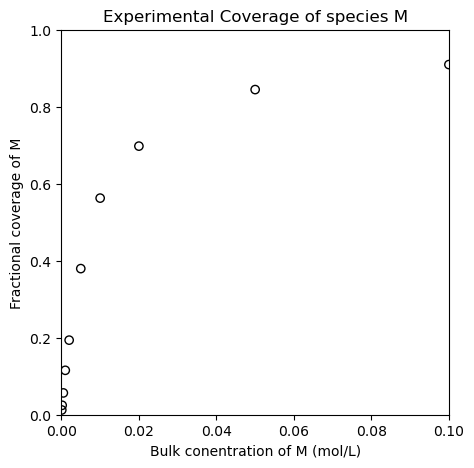

In [2]:
#####################################################################################################
# Define set of experimental CM and fractional coverage of M                                        #
#####################################################################################################

CM_exp     = np.array([0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1]) #mol/L
thetaM_exp = np.array([0.01231471, 0.02450419, 0.05662556, 0.11536265, 0.19374295, 0.37952173, 0.56262205, 0.69767484, 0.84451735, 0.90949091])

#####################################################################################################
# Genearte scatterplot of experimental fractional coverage of M vs CM                               #
#####################################################################################################

plt.figure(figsize = (5, 5))
plt.scatter(CM_exp, thetaM_exp, color = 'none', edgecolor = 'black')
plt.xlim(0, 0.1)
plt.ylim(0, 1)
plt.title('Experimental Coverage of species M')
plt.xlabel('Bulk conentration of M (mol/L)')
plt.ylabel('Fractional coverage of M')
plt.show()

Next we'll fit molecular and dissociative adsorption models to see if one clearly fits better than the other.  We'll do that using the following models for the fractional coverage of M:

**Molecular Adsorption**

$$\theta_M = \frac{K_MC_M}{1 + K_MC_M}$$

**Dissociative Adsorption**

$$\theta_M = \frac{\left(K_M \, C_{M}\right)^{\frac{1}{2}}}{1 + \left(K_M \, C_{M}\right)^{\frac{1}{2}}}$$

We are not introducing any new concepts here; we are just fitting two nonlinear models to our data by generating separate objective functions and minimizing the residual sum of squares (by varying the adsorption constant) for each model. The one that achieves the smallest residual error is the one we would conclude best describes our data.

In [3]:
#####################################################################################################
# Define objective function for molecular adsorption                                                #
#####################################################################################################

def obj_molecular(par):
    KM = par
    CM = CM_exp
    
    thetaM_mod = KM*CM/(1 + KM*CM)
    
    SSE = np.sum((thetaM_exp - thetaM_mod)**2)
    return SSE

#####################################################################################################
# Define objective function for dissociative adsorption                                             #
#####################################################################################################

def obj_dissociative(par):
    KM = par
    CM = CM_exp
    
    thetaM_mod = (KM*CM)**(1/2)/(1 + (KM*CM)**(1/2))
    
    SSE = np.sum((thetaM_exp - thetaM_mod)**2)
    return SSE

#####################################################################################################
# Use nonlinear regression to find optimal parameter values for each model                          #
#####################################################################################################

ans_mol = opt.minimize_scalar(obj_molecular)
ans_dis = opt.minimize_scalar(obj_dissociative)

#####################################################################################################
# Extract optimum parameter values and residual sum of squares                                      #
#####################################################################################################

KM_mol = ans_mol.x
KM_dis = ans_dis.x

SSE_mol = ans_mol.fun
SSE_dis = ans_dis.fun

#####################################################################################################
# Calculate total sum of squares and R2                                                             #
#####################################################################################################

SST     = np.sum((thetaM_exp - np.mean(thetaM_exp))**2)

R2_mol  = 1 - SSE_mol/SST
R2_dis  = 1 - SSE_dis/SST

And then we can plot the models with our optimum results against our experimental data to assess goodness of fit.

For molecular adsorption   , we get KM = 121 L/mol, SSE = 7.78E-04, and R2 = 0.999
For dissociative adsorption, we get KM = 105 L/mol, SSE = 1.24E-01, and R2 = 0.887


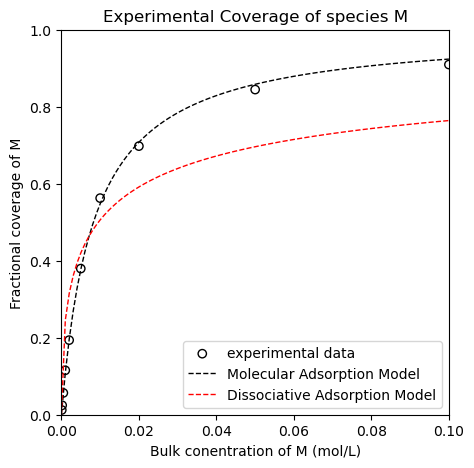

In [4]:
######################################################################################################
# Create functions for molecular and dissociative adsorption using optimal parameter values          #
######################################################################################################

CMfine     = np.linspace(0, 0.1, 100)
thetaM_mol = lambda CM: (KM_mol*CM)/(1 + KM_mol*CM)
thetaM_dis = lambda CM: (KM_dis*CM)**(1/2)/(1 + (KM_dis*CM)**(1/2))

######################################################################################################
# Dispaly optimal parameter values                                                                   #
######################################################################################################

print(f'For molecular adsorption   , we get KM = {KM_mol:3.0f} L/mol, SSE = {SSE_mol:3.2E}, and R2 = {R2_mol:3.3f}')
print(f'For dissociative adsorption, we get KM = {KM_dis:3.0f} L/mol, SSE = {SSE_dis:3.2E}, and R2 = {R2_dis:3.3f}')

######################################################################################################
# Overlay optimal fits for molecular and dissociative adsorption with experimental data              #
######################################################################################################

plt.figure(figsize = (5, 5))
plt.scatter(CM_exp, thetaM_exp, color = 'none', edgecolor = 'black', label = 'experimental data')
plt.plot(CMfine, thetaM_mol(CMfine), color = 'black', linestyle = 'dashed', linewidth = 1, label = 'Molecular Adsorption Model')
plt.plot(CMfine, thetaM_dis(CMfine), color = 'red', linestyle = 'dashed', linewidth = 1, label = 'Dissociative Adsorption Model')
plt.xlim(0, 0.1)
plt.ylim(0, 1)
plt.title('Experimental Coverage of species M')
plt.xlabel('Bulk conentration of M (mol/L)')
plt.ylabel('Fractional coverage of M')
plt.legend()
plt.show()

You can visually determine that the molecular adsorption model provides a much better fit to this data set.  This is also borne out in quantative metrics like the $SSE$ and the $R^2$ value.  

#### Linearization of Isotherms

It is also useful to be able to linearize these models, which is relatively easy to do.  We see that both coverage expressions are monomial functions divided by a polynomial, so we can linearize these models by inversion.

**Molecular Adsorption**

$$\theta_M = \frac{K_MC_M}{1 + K_MC_M}$$

$$\frac{1}{\theta_M} = \frac{1}{K_M}\frac{1}{C_M} + 1$$

**Dissociative Adsorption**

$$\theta_M = \frac{\left(K_M \, C_{M}\right)^{\frac{1}{2}}}{1 + \left(K_M \, C_{M}\right)^{\frac{1}{2}}}$$

$$\frac{1}{\theta_M} = \frac{1}{{K_M}^\frac{1}{2}}\frac{1}{{C_M}^\frac{1}{2}} + 1$$

If we have molecular adsorption, plotting coverage vs. inverse concentration should give a straight line.  If we have dissociative adsorption, we'll see a straight line if we plot coverage vs. inverse square root of concentration.  This is illustrated below for the data set above (which we already determined is well-described by molecular adsorption).  You can see clearly that the data plotted against inverse concentration is linear, which agrees with the molecular adsorption model.

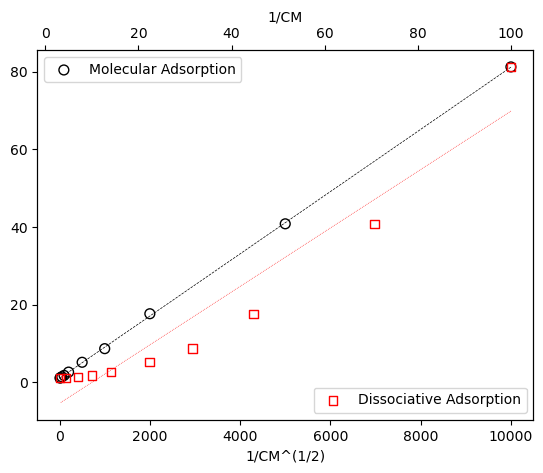

In [5]:
######################################################################################################
# Regress slope and intercept for linearized models                                                  #
######################################################################################################

coeffs_molec = np.polyfit(1/CM_exp, 1/thetaM_exp, 1)
coeffs_disso = np.polyfit(1/CM_exp**(1/2), 1/thetaM_exp, 1)

######################################################################################################
# Evaluate predictions using the above linear models and optimal parameters for each                 #
######################################################################################################

model_molec  = np.polyval(coeffs_molec, 1/CM_exp)
model_disso  = np.polyval(coeffs_disso, 1/CM_exp**(1/2))

######################################################################################################
# Overlay linearized data sets with best fit lines to assess goodness of fit                         #
# Note that this plot uses a different syntax to create two separate x axes                          #
######################################################################################################

fig, ax1     = plt.subplots()
ax2          = ax1.twiny()
molecular    = ax1.scatter(1/CM_exp, 1/thetaM_exp, marker = 'o', s = 50, color = 'none', edgecolor = 'black', label = 'Molecular Adsorption')
molecular    = ax1.plot(1/CM_exp, model_molec, linestyle = 'dashed', linewidth = 0.5, color = 'black')
dissociative = ax2.scatter(1/CM_exp**(1/2), 1/thetaM_exp, marker = 's', color = 'none', edgecolor = 'red', label = 'Dissociative Adsorption')
dissociative = ax2.plot(1/CM_exp**(1/2), model_disso, linestyle = 'dotted', linewidth = 0.5, color = 'red')
ax1.set_xlabel('1/CM^(1/2)')
ax2.set_xlabel('1/CM')
ax2.set_ylabel('1/thetaM')
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'lower right')
plt.show()